# Programming for Data Analysis Assignment 2

# Investigation of the Wisconsin Breast Cancer dataset

<a id="top"></a>
## Table of Contents
 - [Introduction](#introduction)
     - [Information about the dataset](#introdata)
     - [Python Imports](#imports)
     - [Import Data](#importdata)
     - [Data information](#datainfo)
     - [Sample Classification](#classification)
     - [Check for missing Values](#checkmissing)
     - [Remove Unnecessary Columns](#removecols)
     - [Check for zeros in data](#checkzeros)
 - [Literature Review on Classifiers](#litreview)
  

<a id="introduction"></a>

## Introduction

"Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image." (UCI, 1995)

<a id=""></a>

## Information about the dataset

The dataset was obtained from imaging from biopsies in 1992.

It contains 32 columns, including an ID and a classification of the tumor as either Benign (B) or Malignant (M). The remaining 30 columns contain information about the cell nuclei. These columns characterise each biopsie with the measurements: mean, standard error and worst of the following 10 characteristics of the cell nuclei:
 - radius
 - texture
 - Perimeter
 - Area
 - Smoothness
 - Compactness
 - Concavity
 - Concave Points
 - Symmetry
 - Fractal Dimension

There are 569 rows of data, each one correlating to an individual sample. [See Data](#importdata).

There is no missing data and 13 samples have a 0 value for all columns related to Concavity (Concavity & Concave Points). See [Missing Values](#checkmissing) and [Zero Values](#checkzeros).

In the dataset there are 357 benign samples and 212 malignant samples. [See Classification](#classification).

This could lead to misinformation as there is an imbalance in the number of samples for each class.

Attribute Information [See Data Information](#datainfo):

|  | Attribute | Domain | Data Type |
|---|---|---|---|
| 1. | ID number | 8670 - 911320502 | Integer |
| 2. | Class | (B = benign, M = malignant) | Text |
| 3-32. | Characteristics of the cell nuclei | 0 - 4254 | Real |


<a id="imports"></a>

### Python Imports

[Back To Top](#top)

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


<a id='importdata'></a>

### Import Data

[Back To Top](#top)

In [32]:
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data")
df = pd.read_csv("DataInfo/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<a id='datainfo'></a>

### Data information

[Back To Top](#top)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
 df.agg(['min', 'max'])

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
min,8670,B,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,...,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504,NaN
max,911320502,M,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,...,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750,NaN


<a id='classification'></a>

### Sample Classification

[Back To Top](#top)

In [15]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

[Text(0, 0, 'Malignant'), Text(0, 1, 'Benign')]

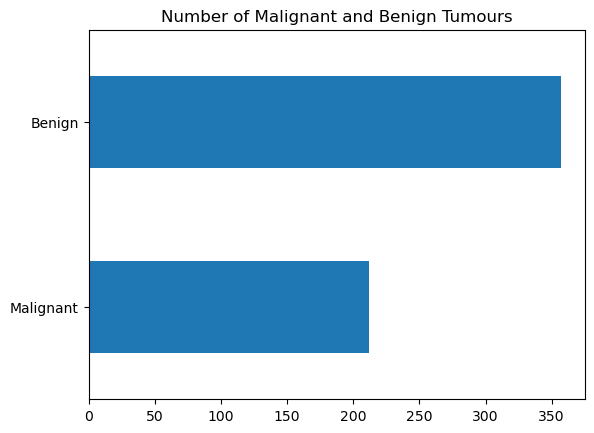

In [45]:
# For 'kind' set to 'bar' for column chart and 'barh' for bar chart.

ax = df['diagnosis'].value_counts().sort_values().plot(kind = 'barh')
plt.title("Number of Malignant and Benign Tumours")
classes = ["Malignant", "Benign"]
ax.set_yticklabels(classes)

<a id="checkmissing"></a>

### Check for missing Values

[Back To Top](#top)

In [16]:
num_missing = df.isnull().sum()
num_missing

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<a id="removecols"></a>

### Remove Unnecessary Columns

[Back To Top](#top)

In [17]:
# The last (Unnamed) colomn needs to br removed as it is generated from the end of line data
# in the.csv file. It is not part of the dataset.

df.drop(['Unnamed: 32'],axis=1,inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
df2 = df.drop(['id'], axis=1)
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<a id='checkzeros'></a>

### Check for Zeros

[Back To Top](#top)

In [31]:
for column in df:
    print(column + ": " + str((df[column] == 0).sum()) )

id: 0
diagnosis: 0
radius_mean: 0
texture_mean: 0
perimeter_mean: 0
area_mean: 0
smoothness_mean: 0
compactness_mean: 0
concavity_mean: 13
concave points_mean: 13
symmetry_mean: 0
fractal_dimension_mean: 0
radius_se: 0
texture_se: 0
perimeter_se: 0
area_se: 0
smoothness_se: 0
compactness_se: 0
concavity_se: 13
concave points_se: 13
symmetry_se: 0
fractal_dimension_se: 0
radius_worst: 0
texture_worst: 0
perimeter_worst: 0
area_worst: 0
smoothness_worst: 0
compactness_worst: 0
concavity_worst: 13
concave points_worst: 13
symmetry_worst: 0
fractal_dimension_worst: 0


#### Note:
All columns in relation to conclavity (Conclavity & Conclave Points) has 13 zeros in the 569 rows.

No other columns have zeros.

<a id="litreview"></a>

## Literature Review on Classifiers

In most instances of data analytics a good starting point in the analysis, is to check for missing and null values. This is part of the data cleansing stage of data analytics. Very often the next step is to get a description of the data. This often means getting a list of columns and their data types as well as the statistical summary of the actual values. This is what Sumbria (2021) has done. The following 8 statistics for the values in each column were generated:
1. Count
2. Mean
3. Standard Deviation
4. The minimum value
5. The first quartile
6. The second quartile
7. The third quartile
8. The maximum value

These high level figures give  an idea of the spread of the data for each cell nuclei characteristc.

In the case of the Wisconsin Breast Cancer dataset a good next step is to divide the data out into the columns related to the mean of each cell nuclei characteristic, the standard error os same and finally the worst of the characteristics. Ahmad (n.d.) and Sumbria (2021) did this as a next step.

An exploratory data analysis looks at the correlation 

Nearest neighbour,

<a id='analysis'></a>

### Analysis

[Back To Top](#top)

In [21]:
df2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [56]:
# Break data into 3 separate dataframes. One for each of:
# 1. The Mean
# 2. The standard Error
# 3. The Worst

df_mean = df2[df2.columns[:11]]
df_se = df2.drop(df2.columns[1:11], axis=1)
df_se = df_se.drop(df_se.columns[11:], axis=1)
df_worst = df2.drop(df2.columns[1:21], axis=1)


    diagnosis  radius_worst  texture_worst  perimeter_worst  area_worst  \
0           M        25.380          17.33           184.60      2019.0   
1           M        24.990          23.41           158.80      1956.0   
2           M        23.570          25.53           152.50      1709.0   
3           M        14.910          26.50            98.87       567.7   
4           M        22.540          16.67           152.20      1575.0   
..        ...           ...            ...              ...         ...   
564         M        25.450          26.40           166.10      2027.0   
565         M        23.690          38.25           155.00      1731.0   
566         M        18.980          34.12           126.70      1124.0   
567         M        25.740          39.42           184.60      1821.0   
568         B         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.665

In [22]:
names = df2.columns[5:11]
# convert DataFrame to list
values=[] 
for column in df2.iloc[:,5:11].columns:
    li = df2[column].tolist()
    values.append(li)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

fig = go.Figure()
for xd, yd, cls in zip(names, values, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='outliers',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=3,
            line_width=2)
        )
fig.show()

# Bibliography

[Back To Top](#top)

Abdulkareem, S.A., Abdulkareem, Z.O., (2021) “An Evaluation of the Wisconsin Breast Cancer Dataset using Ensemble Classifiers and RFE Feature Selection Technique”, International Journal of Sciences: Basic and Applied Research (IJSBAR), 55(2), pp. 67–80. Available at: https://gssrr.org/index.php/JournalOfBasicAndApplied/article/view/12300 (Accessed: 29 December 2022).

Ahmed, t., Imtiaz, N., Karmakar, A., (2020) Analysis of Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction. Available at: https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf (Accessed 29 December 2022)

Ahmad, U.K., (n.d.) Breast Cancer Wisconsin dataset Analysis. Available at: https://deepnote.com/@umaima-khurshid-ahmad-a1fd/Wisconsin-Breast-Cancer-Analysis-7f141f92-beb3-42ac-a223-de5569144e9b (Accessed: 29 December)

Barford, B., (n.d.) Machine Learning for Cancer Diagnosis and Prognosis. Available at: https://pages.cs.wisc.edu/~olvi/uwmp/cancer.html (Accessed: 29 December 2022)

Karagiannis, G., (2022) Breast cancer detection using KNN and SVM. Available at: https://www.kaggle.com/code/georgioskaragiannis/breast-cancer-detection-using-knn-and-svm (Accessed: 29 December 2022)

Kaggle (2016) Breast Cancer Wisconsin (Diagnostic) Data Set. Available at: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data (Accessed: 23 December 2022)

Mohammad, W.T., Teete, R., Al-Aaraj, H., Rubbai, Y.S., Arabyat, M.M., (2022) "Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques", Applied Bionics and Biomechanics, vol. 2022, Article ID 6187275, 9 pages. Available at: https://doi.org/10.1155/2022/6187275 (Accessed: 27 December 2022)

Sumbria, S., (2021) Breast Cancer Wisconsin (Diagnostic) - Exploratory Data Analysis. Available at: https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd#:~:text=This%20is%20clean%20Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set&text=Features%20are%20computed%20from%20a,(MSM%2DT)%20%5BK.%20P. (Accessed 27 December 2022)

UCI, (1995) Breast Cancer Wisconsin (Diagnostic) Data Set. Available at: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic) (Accessed: 16 December 2022)

UCI, (1992) Breast Cancer Wisconsin (Original) Data Set. Available at: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29 (Accessed: 16 December 2022)

Yael, K. (2017) Wisconsin Breast Cancer (Diagnostic) DataSet Analysis. Available at: https://rstudio-pubs-static.s3.amazonaws.com/344010_1f4d6691092d4544bfbddb092e7223d2.html (Accessed: 28 December 2022)

Zhang, Y., (2019) Deep Learning in Wisconsin Breast Cancer Diagnosis. Available at: https://towardsdatascience.com/deep-learning-in-winonsin-breast-cancer-diagnosis-6bab13838abd (Accessed 28 December 2022)
